Questions

1. How can we extract and interpret decision rules from a decision tree model to understand its decision-making process, and how can this be implemented in Python?

Solution: Steps to Extract and Interpret Decision Rules-
          a) Train the Decision Tree Model
          b) Extract Decision Rules: Use functions provided by libraries such as sklearn to extract the rules from the trained decision tree. The export_text function from sklearn.tree is particularly useful for this purpose.
          c) Interpret the Rules
          d) Plotting the decision tree provides a visual representation of the decision-making process, helping to understand the structure and decision paths of the tree.

Here's how you can implement these steps using Python:

Decision Tree Classification Report:

              precision    recall  f1-score   support

     class_0       0.95      0.95      0.95        19
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


Decision Tree Rules:

|--- color_intensity <= 3.82
|   |--- proline <= 1010.00
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1010.00
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- alcohol <= 13.14
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.14
|   |   |   |   |--- class: 0
|   |   |--- proline >  724.50
|   |   |   |--- class: 0


Feature Importances:

al

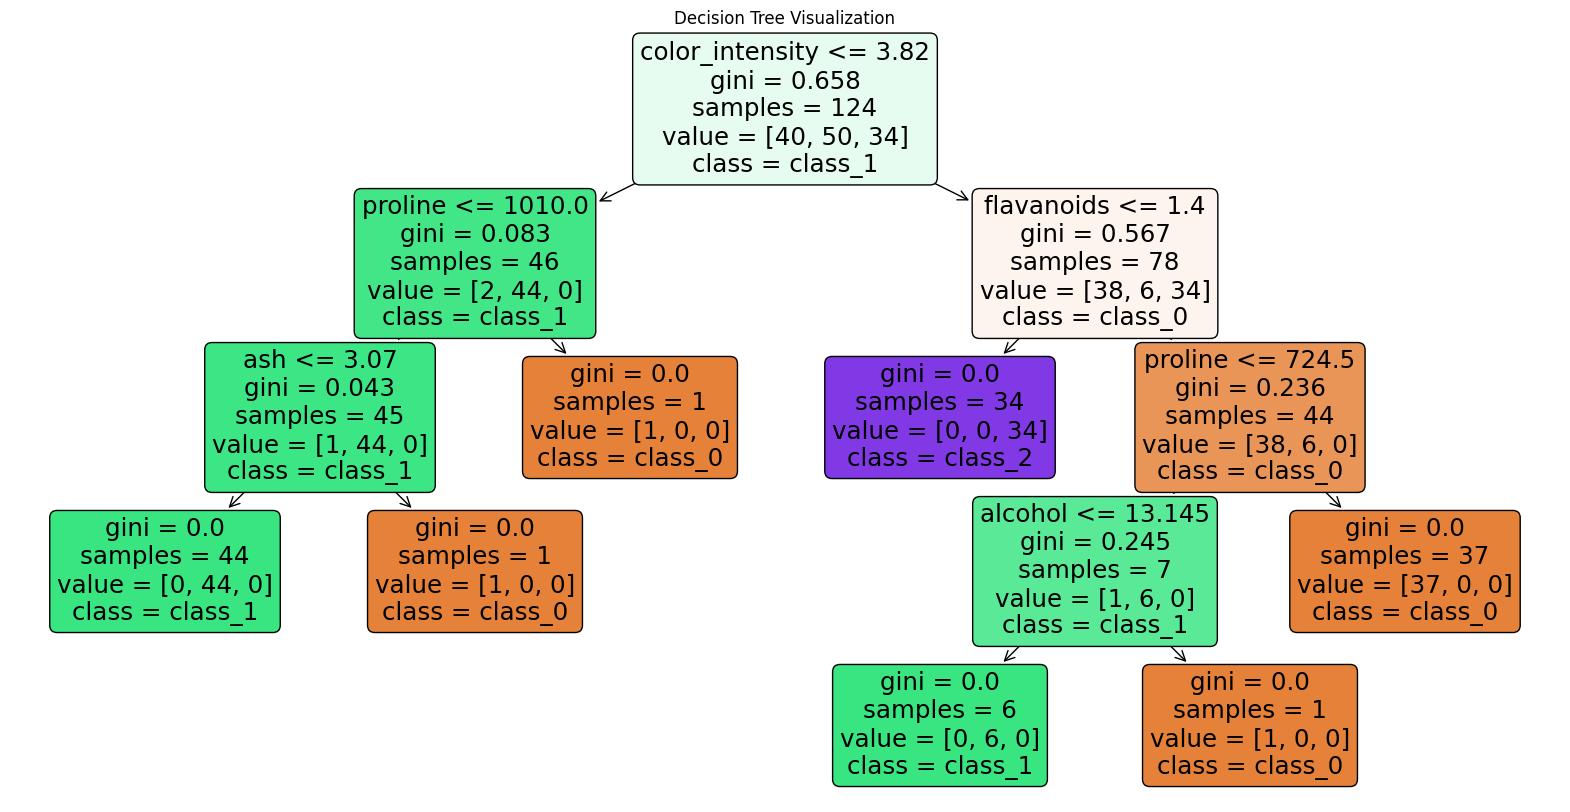

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Extract decision rules
def extract_rules(clf, feature_names):
    """Extract decision rules from a decision tree classifier."""
    tree_rules = export_text(clf, feature_names=feature_names)
    return tree_rules

# Extract and print decision rules
feature_names = data.feature_names
rules = extract_rules(clf, feature_names)
print("\nDecision Tree Rules:\n")
print(rules)

# Interpretation: Print feature importances
print("\nFeature Importances:\n")
for feature, importance in zip(feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Optional: Plot the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


2. How can a ternary split with two thresholds and three branches be used instead of a binary split for numeric inputs in decision tree modeling, what are the benefits and challenges of this approach, and how can it be implemented in Python?

   Solution: In decision tree modeling, a ternary split involves dividing a numeric feature into three distinct regions based on two thresholds, as opposed to a binary split, which divides the feature into two regions based on a single threshold. Specifically, if the numeric feature x has threshold t1 and t2, the split would classify the data into:
   a) x <= t1, b) t1<= x <=t2 and c) x > t2




Benefits of Ternary Splits in Decision Trees:
a) Enhanced Granularity
b) Potential for Improved Accuracy
c) Increased Flexibility


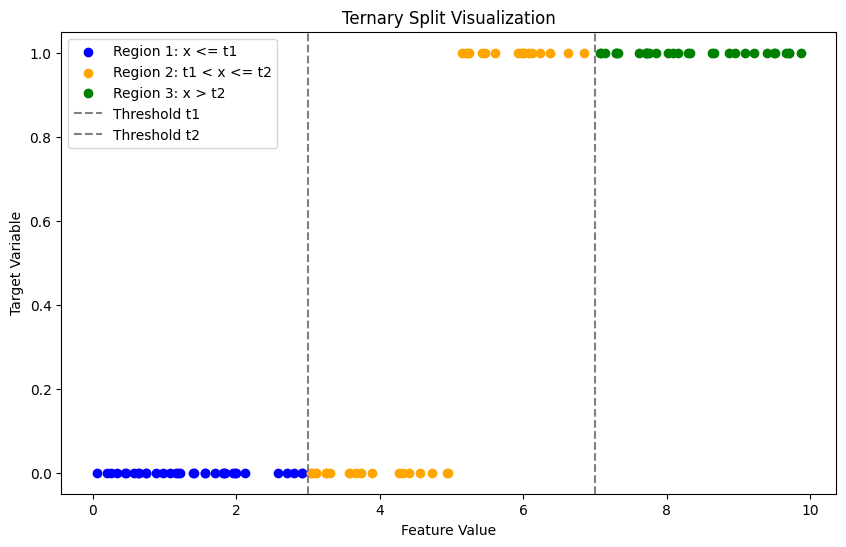

Predictions: [0. 1. 1. 2.]
Actual: [0 1 1 2]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a small synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = (X > 5).astype(int).ravel()  # Binary target variable based on a threshold of 5

# Define thresholds for ternary splits
t1, t2 = 3, 7

# Define a function to apply ternary splits
def apply_ternary_split(X, t1, t2):
    """
    Apply a ternary split to the feature array X based on thresholds t1 and t2.
    Returns three boolean arrays corresponding to the three regions.
    """
    # Flatten X to 1D array for logical indexing
    X_flat = X.ravel()
    region1 = X_flat <= t1
    region2 = (X_flat > t1) & (X_flat <= t2)
    region3 = X_flat > t2
    return region1, region2, region3

# Apply ternary split to the dataset
region1, region2, region3 = apply_ternary_split(X, t1, t2)

# Plotting the ternary split
plt.figure(figsize=(10, 6))
plt.scatter(X[region1], y[region1], color='blue', label='Region 1: x <= t1')
plt.scatter(X[region2], y[region2], color='orange', label='Region 2: t1 < x <= t2')
plt.scatter(X[region3], y[region3], color='green', label='Region 3: x > t2')
plt.axvline(x=t1, color='gray', linestyle='--', label='Threshold t1')
plt.axvline(x=t2, color='gray', linestyle='--', label='Threshold t2')
plt.xlabel('Feature Value')
plt.ylabel('Target Variable')
plt.legend()
plt.title('Ternary Split Visualization')
plt.show()

# Define a simple decision function for demonstration
def predict_with_ternary_split(X_new, t1, t2):
    """
    Predict using a ternary split with two thresholds.
    """
    X_new_flat = X_new.ravel()  # Flatten X_new for prediction
    predictions = np.zeros(X_new_flat.shape[0])
    predictions[X_new_flat <= t1] = 0  # Region 1
    predictions[(X_new_flat > t1) & (X_new_flat <= t2)] = 1  # Region 2
    predictions[X_new_flat > t2] = 2  # Region 3
    return predictions

# Test predictions with new data
X_test = np.array([[2], [4], [6], [8]])
y_test = np.array([0, 1, 1, 2])
y_pred = predict_with_ternary_split(X_test, t1, t2)
print(f"Predictions: {y_pred}")
print(f"Actual: {y_test}")


3. How can we build a regression tree to model a dataset and visualize the decision boundaries (regression regions) for predicting continuous values?

Solution: It involves the following steps:
a) Data Collection and Preprocessing
b) Building the Regression Tree
c) Visualizing the Decision Boundaries


Here’s how to build and visualize a regression tree using Python:

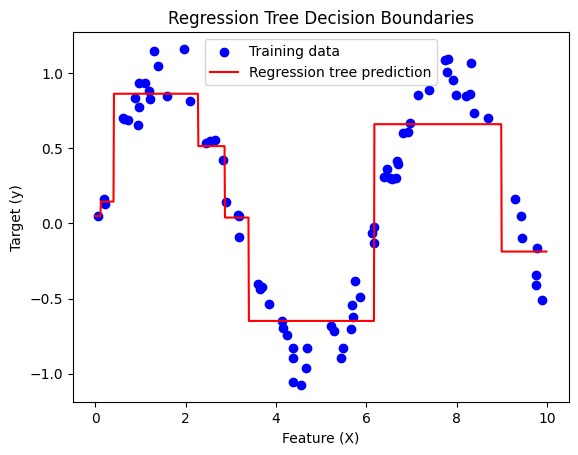

Mean Squared Error on Test Set: 0.057


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = np.sin(X).ravel() + np.random.randn(100) * 0.1  # Target is a sine function with noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the regression tree model
regressor = DecisionTreeRegressor(max_depth=3)  # Set max depth to prevent overfitting
regressor.fit(X_train, y_train)

# Step 4: Visualize the decision boundaries
# Create a grid of values for X to visualize the predictions
X_grid = np.arange(0, 10, 0.01).reshape(-1, 1)
y_pred_grid = regressor.predict(X_grid)

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')
# Plot the regression tree predictions (decision boundaries)
plt.plot(X_grid, y_pred_grid, color='red', label='Regression tree prediction')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Regression Tree Decision Boundaries')
plt.legend()
plt.show()

# Step 5: Evaluate the model performance
y_pred_test = regressor.predict(X_test)
mse = np.mean((y_pred_test - y_test) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.3f}")


4. How can discontinuities at leaf boundaries in regression trees be reduced, and how can this approach be implemented in Python?

Solution: In regression trees, discontinuities at the leaf boundaries arise because the model predicts a constant value within each leaf (or region) and changes abruptly between adjacent leaves. To reduce discontinuities in regression trees, techniques like pruning or employing decision tree variants like model trees can be effective.

Here’s a Python implementation of pruning to reduce discontinuities:



Train MSE (Unpruned): 0.0
Test MSE (Unpruned): 1.3483202745887781


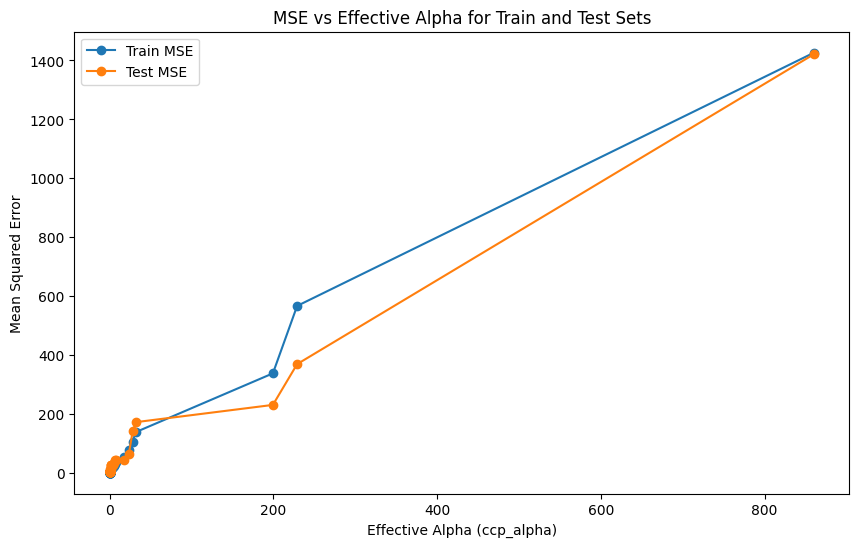

Optimal Alpha: 0.0001261675769825388
Test MSE (Pruned): 1.3424012933981089


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an initial regression tree without pruning
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Predict and calculate mean squared error for unpruned tree
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
print(f"Train MSE (Unpruned): {mean_squared_error(y_train, y_pred_train)}")
print(f"Test MSE (Unpruned): {mean_squared_error(y_test, y_pred_test)}")

# Apply Cost-Complexity Pruning with different ccp_alpha values
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Extract alphas
trees = []

# Train trees for different pruning levels
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    trees.append(pruned_tree)

# Evaluate the effect of pruning on train and test MSE
train_mse = [mean_squared_error(y_train, tree.predict(X_train)) for tree in trees]
test_mse = [mean_squared_error(y_test, tree.predict(X_test)) for tree in trees]

# Plot the effect of pruning
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_mse, label="Train MSE", marker='o')
plt.plot(ccp_alphas, test_mse, label="Test MSE", marker='o')
plt.xlabel("Effective Alpha (ccp_alpha)")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Effective Alpha for Train and Test Sets")
plt.legend()
plt.show()

# Choose the optimal pruned tree (based on test MSE or other criteria)
optimal_alpha = ccp_alphas[np.argmin(test_mse)]
optimal_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
optimal_tree.fit(X_train, y_train)

# Predict using the optimal pruned tree
y_pred_optimal = optimal_tree.predict(X_test)
print(f"Optimal Alpha: {optimal_alpha}")
print(f"Test MSE (Pruned): {mean_squared_error(y_test, y_pred_optimal)}")



5. Explain both prepruning and postpruning techniques for decision trees, including their implementation and evaluation using Python.

Solution: Pruning is an important technique used to prevent overfitting in decision trees by reducing their complexity. Decision trees can easily overfit data, leading to poor generalization on new, unseen data. There are two main types of pruning techniques: prepruning and postpruning.

Prepruning prevents overfitting early by setting constraints, such as limiting the tree depth or requiring a minimum number of samples per split.

Implementation of Prepruning in Python:

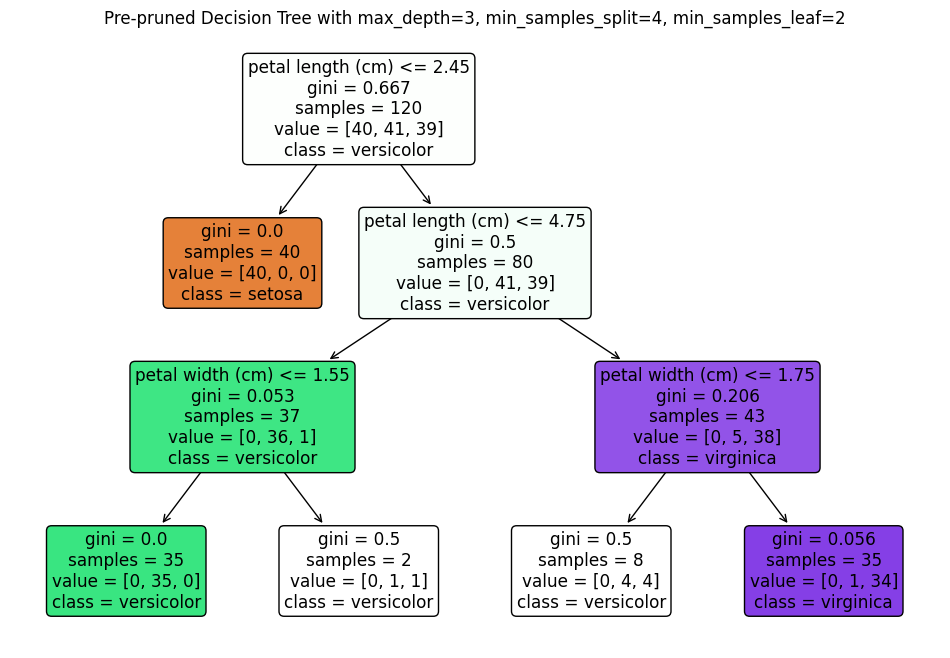

Test Accuracy with pre-pruning: 1.0000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Pre-pruning by setting constraints
# You can set constraints like max_depth, min_samples_split, and min_samples_leaf
prepruned_clf = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=4, min_samples_leaf=2)
prepruned_clf.fit(X_train, y_train)

# Plot the pre-pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(prepruned_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.title("Pre-pruned Decision Tree with max_depth=3, min_samples_split=4, min_samples_leaf=2")
plt.show()

# Evaluate the pre-pruned model
y_pred = prepruned_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with pre-pruning: {accuracy:.4f}")


Postpruning involves fully growing the tree and then pruning it back to reduce complexity, often through cost complexity pruning with ccp_alpha.

Implementation of Postpruning in Python

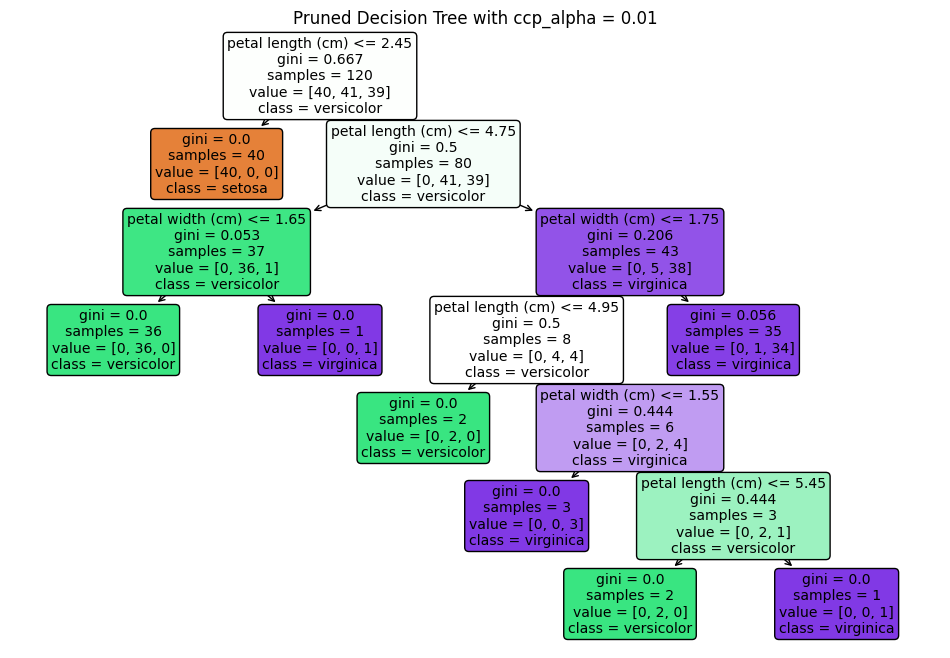

Test Accuracy with ccp_alpha = 0.01: 1.0000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a DecisionTreeClassifier with a specific ccp_alpha value
ccp_alpha_value = 0.01  # Set your preferred value for ccp_alpha
pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha_value)
pruned_clf.fit(X_train, y_train)

# Plot the pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(pruned_clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.title(f"Pruned Decision Tree with ccp_alpha = {ccp_alpha_value}")
plt.show()

# Evaluate the pruned model
y_pred = pruned_clf.predict(X_test)
accuracy = pruned_clf.score(X_test, y_test)
print(f"Test Accuracy with ccp_alpha = {ccp_alpha_value}: {accuracy:.4f}")
